# Importación de bibliotecas necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import tkinter as tk

# Tarea 1: Contar píxeles blancos por filas. Determinar el valor máximo de los píxeles blancos para filas,mostrando el número de filas y sus respectivas posiciones, con un número de píxeles mayor o igual que el 90% del máximo.

### Conteo:

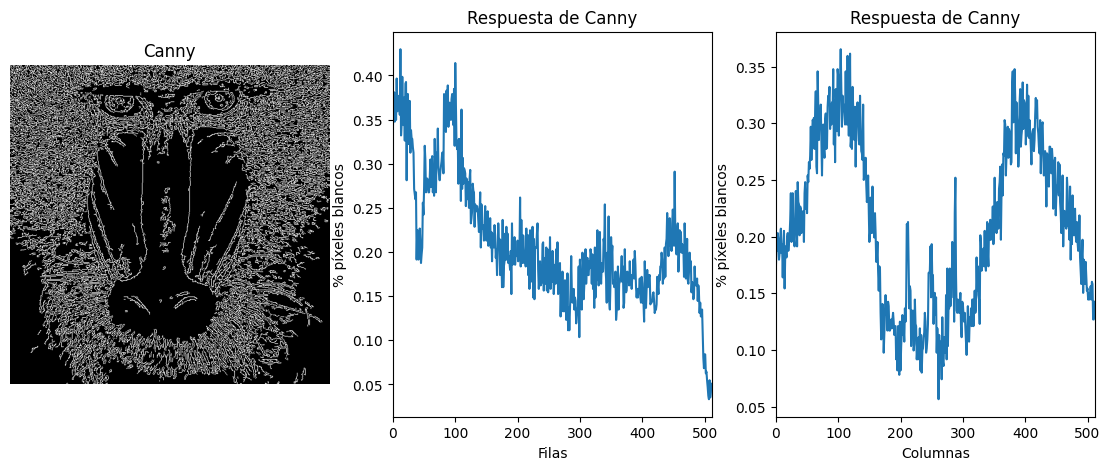

In [2]:
img = cv2.imread('imgs/mandril.jpg')
# #Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)

#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
row = row_counts / (255 * canny.shape[1])

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles blancos")
plt.plot(row)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]]) 

plt.subplot(1, 3, 3)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles blancos")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])
plt.savefig("imgs/histogramas_filas_columnas_canny.jpg")


## Reducir por filas obteniendo su ratio de píxeles blancos, el valor de la fila con mayor número de estos y conteo de aquellas que tienen un valor de píxeles blancos mayor o igual al 90% del máximo

### Filas:

Valor máximo de píxeles blancos por fila: 0.4297
Esto representa 42.97% de píxeles blancos en la fila

Umbral (0.90 * maxfil): 0.3867


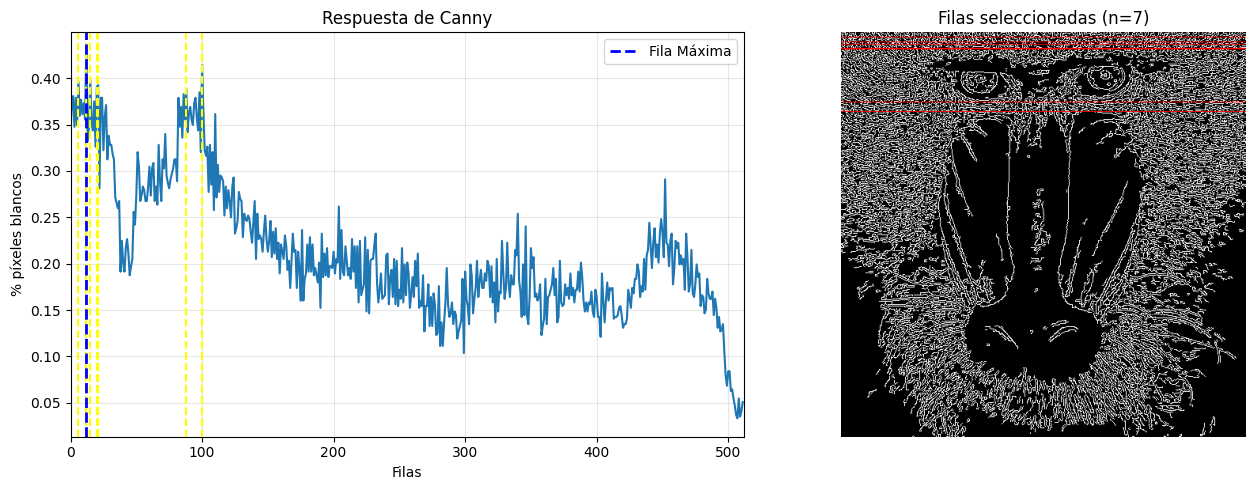

In [3]:
max_row = np.max(row)

print(f"Valor máximo de píxeles blancos por fila: {max_row:.4f}")
print(f"Esto representa {max_row * 100:.2f}% de píxeles blancos en la fila")

umbral = .9 * max_row

print(f"\nUmbral (0.90 * maxfil): {umbral:.4f}")

filas_seleccionadas = np.where(row >= umbral)[0]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles blancos")
plt.plot(row)

# umbral
#plt.axhline(y=umbral,color="red", linestyle='--', linewidth=2, label=f"Umbral (0.90*max_row)")

for fila in filas_seleccionadas:
    plt.axvline(x=fila,color="yellow", linestyle='--')

# maximo
#plt.axhline(y=max_row,color="green", linestyle='--', linewidth=2, label=f"Valor Máximo")
plt.axvline(x=(np.where(row == max_row)[0]),color="blue", linestyle='--', linewidth=2, label=f"Fila Máxima")


#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Filas seleccionadas (n={len(filas_seleccionadas)})")
plt.axis("off")
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for fila in filas_seleccionadas:
    canny_color[fila, :] = [0, 0, 255]

plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_filas_canny.jpg")
plt.show()

### Columnas:

Valor máximo de píxeles blancos por columna: 0.3652
Esto representa 36.52% de píxeles blancos en la columna

Umbral (0.90 * maxfil): 0.3287


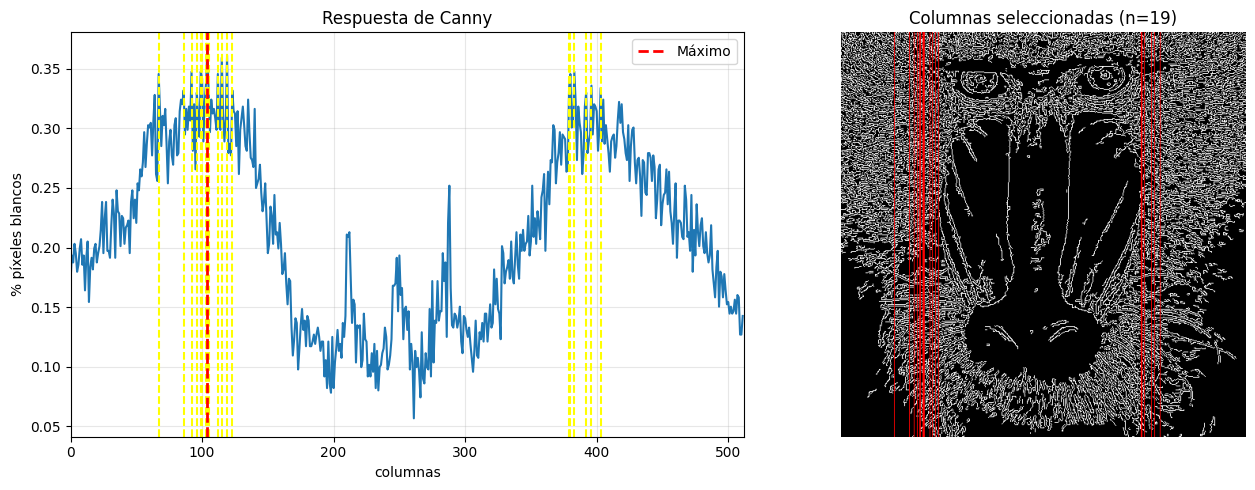

In [4]:
max_col = np.max(cols)

print(f"Valor máximo de píxeles blancos por columna: {max_col:.4f}")
print(f"Esto representa {max_col * 100:.2f}% de píxeles blancos en la columna")

umbral = 0.90 * max_col

print(f"\nUmbral (0.90 * maxfil): {umbral:.4f}")

columnas_seleccionadas = np.where(cols >= umbral)[0]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Respuesta de Canny")
plt.xlabel("columnas")
plt.ylabel("% píxeles blancos")
plt.plot(cols)

# umbral
for columna in columnas_seleccionadas:
    plt.axvline(x=columna,color="yellow", linestyle='--')

# maximo
plt.axvline(x=(np.where(cols == max_col)),color="red", linestyle='--', linewidth=2, label=f"Máximo")

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])
#plt.ylim([0, max(row) * 1.1])

plt.legend()
plt.grid(True, alpha=0.3)

# filas marcadas
plt.subplot(1, 2, 2)
plt.title(f"Columnas seleccionadas (n={len(columnas_seleccionadas)})")
plt.axis("off")
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Marcar las filas seleccionadas en rojo
for columna in columnas_seleccionadas:
    canny_color[:,columna] = [0, 0, 255]

plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.savefig("imgs/analisis_columnas_canny.jpg")
plt.show()

# Tarea 2: Aplicar umbralizado a la imagen resultante de Sobel, y posteriormente realizar conteo de filas y columnas no nulos. Calcular el valor máximo de la cuenta por filas y columnas y determinar aquellas por encima del 90% del máximo. Remarcar dichas filas y columnas en la imagen

## Aplicar Sobel

True

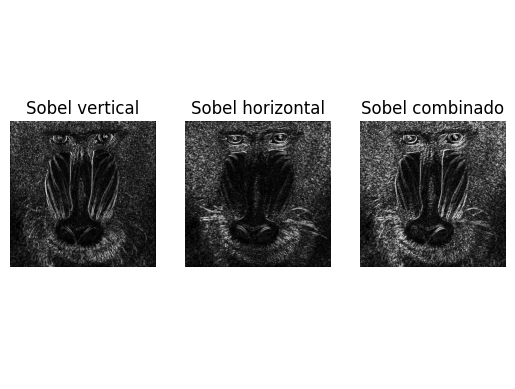

In [9]:
gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), (3, 3), 0)
sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
sobel = cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))

plt.figure()
plt.axis('off')

plt.subplot(1, 3, 1)
plt.title('Sobel vertical')
plt.axis('off')
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel horizontal')
plt.axis('off')
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel combinado')
plt.axis('off')
plt.imshow(sobel, cmap='gray')

plt.savefig('imgs/mandril_sobel.jpg')
cv2.imwrite('imgs/mandril_sobel_vertical.jpg', sobel_x)
cv2.imwrite('imgs/mandril_sobel_horizontal.jpg', sobel_y)
cv2.imwrite('imgs/mandril_sobel_solo.jpg', sobel)

# Calcular histograma para identificar el umbral correcto

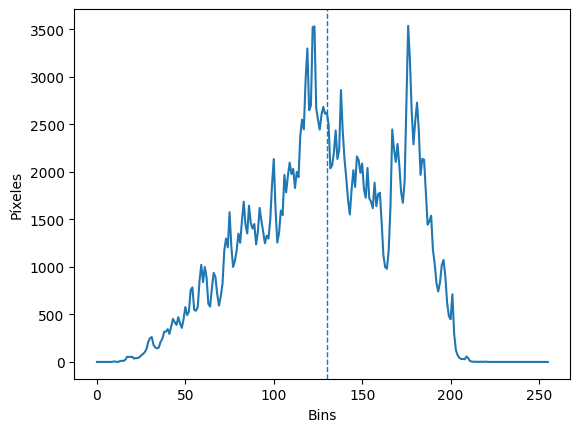

In [10]:
histogram = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)], [0], None, [256], [0, 256])

plt.figure()
plt.xlabel("Bins")
plt.ylabel("Píxeles")
plt.plot(histogram)

plt.axvline(x=130, linestyle='--', linewidth=1)

plt.savefig('imgs/mandril_histograma.jpg')

## Umbralizado de la imagen

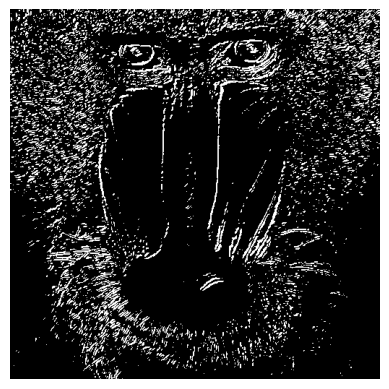

In [11]:
threshold = 130

_, threshold_image_sobel = cv2.threshold(sobel, threshold, 255, cv2.THRESH_BINARY)

plt.axis('off')
plt.imshow(threshold_image_sobel, cmap='gray')
plt.savefig('imgs/mandril_umbralizado.jpg')

## Conteo de filas y columnas con valores de píxeles no nulos

### Función para obtener filas / columnas con el número de píxeles no nulos, el índice del elemento de mayor valor, el propio valor y un diccionario con el índice y valor de las filas / columnas con valor mayor l 90% del máximo

In [12]:
def statistics(image, p, axis):
    counts = np.count_nonzero(image, axis=axis)
    max_index = np.argmax(counts)
    max_value = counts[max_index]
    threshold = p*max_value
    return counts, max_index, max_value, {i: int(counts[i]) for i in range(len(counts)) if counts[i] > threshold}

### Uso de la función de estadísticas y posterior muestra en consola

In [13]:
counts_rows_sobel, max_row_index_sobel, max_row_value_sobel, rows_sobel = statistics(threshold_image_sobel, .9, 1)
counts_columns_sobel, max_column_index_sobel, max_column_value_sobel, columns_sobel = statistics(threshold_image_sobel, .9, 0)

print("-------------Filas-------------")
print(f"La fila con índice {max_row_index_sobel} tiene el valor máximo con {max_row_value_sobel} píxeles blancos")
print("Las filas que tienen un valor mayor al 90% del máximo son las siguientes:", '\n\t'.join(f"Fila {row} con valor {value}" for row, value in rows_sobel.items()), sep='\n\t')
print("------------Columnas-----------")
print(f"La columna con índice {max_column_index_sobel} tiene el valor máximo con {max_column_value_sobel} píxeles blancos")
print("Las columnas que tienen un valor mayor al 90% del máximo son las siguientes:", '\n\t'.join(f"Columna {column} con valor {value}" for column, value in columns_sobel.items()), sep='\n\t')

-------------Filas-------------
La fila con índice 82 tiene el valor máximo con 161 píxeles blancos
Las filas que tienen un valor mayor al 90% del máximo son las siguientes:
	Fila 3 con valor 155
	Fila 4 con valor 149
	Fila 20 con valor 149
	Fila 51 con valor 151
	Fila 81 con valor 152
	Fila 82 con valor 161
	Fila 83 con valor 154
------------Columnas-----------
La columna con índice 288 tiene el valor máximo con 179 píxeles blancos
Las columnas que tienen un valor mayor al 90% del máximo son las siguientes:
	Columna 288 con valor 179


## Remarcando con gráficas dichos valores en la imagen del mandril

### Función para dibujar las filas y columnas en la imagen

In [14]:
def draw_rows_and_columns(image, rows, columns):
    h, w, *_ = image.shape
    for row in rows.keys():
        cv2.line(image, (0, row), (w, row), (255, 0, 0), 1)

    for col in columns.keys():
        cv2.line(image, (col, 0), (col, h), (0, 255, 0), 1)

### Dibujado de filas y columnas en la imagen

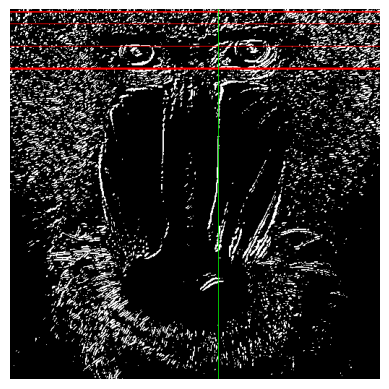

In [15]:
threshold_image_marked = cv2.cvtColor(threshold_image_sobel, cv2.COLOR_GRAY2RGB)

draw_rows_and_columns(threshold_image_marked, rows_sobel, columns_sobel)

plt.axis('off')
plt.imshow(threshold_image_marked, cmap='gray')

plt.savefig('imgs/mandril_umbralizado_filas_columnas.jpg')

## Comparación de Sobel y Canny


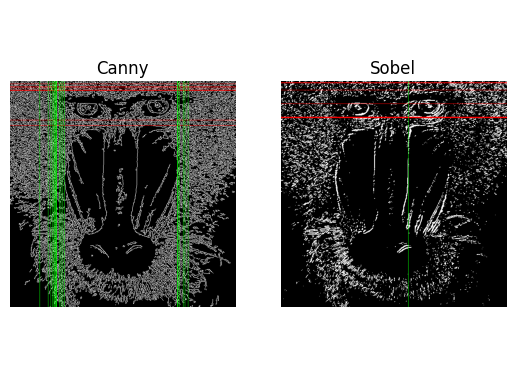

In [16]:
_, threshold_image_canny = cv2.threshold(canny, threshold, 255, cv2.THRESH_BINARY)

counts_rows_canny, max_row_index_canny, max_row_value_canny, rows_canny = statistics(canny, .9, 1)
counts_columns_canny, max_column_index_canny, max_column_value_canny, columns_canny = statistics(canny, .9, 0)

threshold_image_canny_marked = cv2.cvtColor(threshold_image_canny.copy(), cv2.COLOR_GRAY2RGB)

draw_rows_and_columns(threshold_image_canny_marked, rows_canny, columns_canny)

plt.figure()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Canny')
plt.axis('off')
plt.imshow(threshold_image_canny_marked, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sobel')
plt.axis('off')
plt.imshow(threshold_image_marked, cmap='gray')
plt.savefig('imgs/mandril_canny_vs_sobel.jpg')

## Comparación de filas y columnas Sobel vs Canny

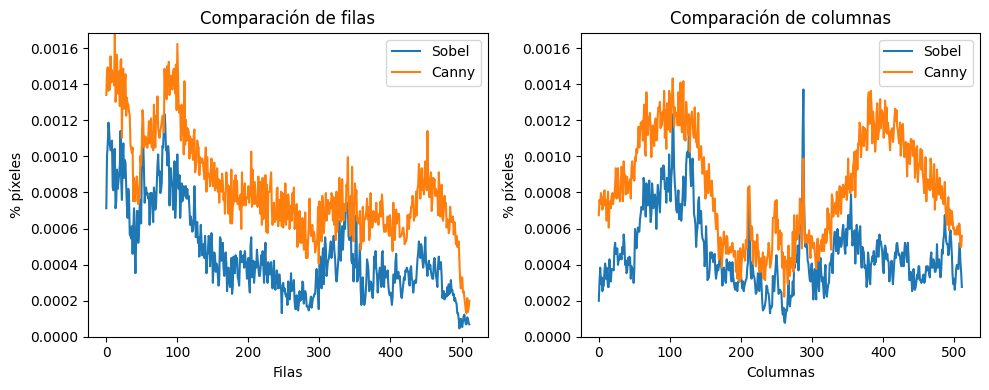

In [18]:
sobel_ratio_y = counts_rows_sobel / (255 * threshold_image_sobel.shape[1])
sobel_ratio_x = counts_columns_sobel / (255 * threshold_image_sobel.shape[0])
canny_ratio_y = counts_rows_canny / (255 * threshold_image_canny.shape[1])
canny_ratio_x = counts_columns_canny / (255 * threshold_image_canny.shape[0])

plt.figure(figsize=(10, 4))

y_max = max(
    max(sobel_ratio_y), max(canny_ratio_y),
    max(sobel_ratio_x), max(canny_ratio_x)
)

plt.subplot(1, 2, 1)
plt.title('Comparación de filas')
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(sobel_ratio_y, label='Sobel')
plt.plot(canny_ratio_y, label='Canny')
plt.legend(loc='upper right')
plt.ylim(0, y_max)

plt.subplot(1, 2, 2)
plt.title('Comparación de columnas')
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(sobel_ratio_x, label='Sobel')
plt.plot(canny_ratio_x, label='Canny')
plt.legend(loc='upper right')
plt.ylim(0, y_max)

plt.tight_layout()
plt.savefig('imgs/canny_vs_sobel_porcentaje.jpg')
plt.show()


# Tarea 3: Demostrador

## Clase realizada con las funciones del demostrador

In [ ]:
from enum import Enum

class Demo(Enum):
    NEGATIVE = 0
    INVERT_GREEN = 1
    INVERT_RED = 2
    INVERT_BLUE = 3
    INVERTED_COLLAGE = 10
    CANNY_INVERTED = 4
    ISOLATE = 5
    SOBEL = 6
    THRESHOLD = 7
    

    @classmethod
    def apply_transformation(cls, image, transformation, *args):
        methods_map = {
            cls.NEGATIVE: cls.inverted_collage,
            cls.INVERT_GREEN: cls.invert_green,
            cls.INVERT_RED: cls.invert_red,
            cls.INVERT_BLUE: cls.invert_blue,
            cls.INVERTED_COLLAGE: cls.inverted_collage,
            cls.CANNY_INVERTED: cls.canny_inverted,
            cls.ISOLATE: cls.isolate_color,
            cls.SOBEL: cls.sobel,
            cls.THRESHOLD: cls.threshold_function
        }
        if transformation in methods_map:
            return methods_map[transformation](image, *args)
        else:
            raise ValueError(f"Transformación {transformation} no válida")

    @staticmethod
    def negative_image(image, *args):
        return 255 - image
    
    @staticmethod
    def invert_green(image, *args):
        image = image.copy()
        image[:,:,1] = 255 - image[:,:,1]
        return image

    @staticmethod
    def invert_red(image, *args):
        image = image.copy()
        image[:,:,2] = 255 - image[:,:,2]
        return image

    @staticmethod
    def invert_blue(image, *args):
        image = image.copy()    
        image[:,:,0] = 255 - image[:,:,0]
        return image
    
    @staticmethod
    def inverted_collage(image, *args):
        row1 = cv2.hconcat([Demo.negative_image(image), Demo.invert_red(image)])
        row2 = cv2.hconcat([Demo.invert_green(image), Demo.invert_blue(image)])

        return cv2.vconcat([row1, row2])
    
    @staticmethod
    def change_color_percentage(image, r=1, g=1, b=1):
        image = image.copy()
        image[:,:,0] = (image[:,:,0] * r) if r != -1 else 255 - image[:,:,0]
        image[:,:,1] = (image[:,:,1] * g) if g != -1 else 255 - image[:,:,1]
        image[:,:,2] = (image[:,:,2] * b)if b != -1 else 255 - image[:,:,2]
        return image
    
    @staticmethod
    def canny_inverted(image, *args):
        return Demo.negative_image(cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 50, 200))
    
    @staticmethod
    def sobel(image, *args):
        gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (3, 3), 0)
        sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
        sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
        return cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))
    
    @staticmethod
    def isolate_color(image, mask1, mask2):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, mask1, mask2)
        color_part = cv2.bitwise_and(image, image, mask=mask)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        return np.where(mask[:, :, None] != 0, color_part, gray_bgr)

    @staticmethod
    def threshold_function(image, *args):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, threshold_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return threshold_image


## Clase realizada para la interfaz del demostrador

In [ ]:
class Demostrator:
    def __init__(self, root):
        self.root = root
        self.root.title("Video con Controles")

        self.video = cv2.VideoCapture(0)
        self.current_method = Demo.INVERTED_COLLAGE

        self.methods_map = {
            "1": Demo.INVERTED_COLLAGE,
            "2": Demo.CANNY_INVERTED,
            "3": Demo.ISOLATE,
            "4": Demo.SOBEL,
            "5": Demo.THRESHOLD
        }

        left_frame = tk.Frame(self.root)
        left_frame.pack(side=tk.LEFT, padx=10, pady=10)

        self.method_label = tk.Label(left_frame, text=self.current_method, font=("Arial", 14))
        self.method_label.pack()

        self.video_label = tk.Label(left_frame)
        self.video_label.pack()

        instrucciones = (
            "1 - INVERTED_COLLAGE\n"
            "2 - CANNY\n"
            "3 - ISOLATE\n"
            "4 - SOBEL\n"
            "5 - THRESHOLD\n"
            "ESC - Salir"
        )
        self.info_label = tk.Label(left_frame, text=instrucciones, font=("Arial", 12))
        self.info_label.pack(pady=10)

        right_frame = tk.LabelFrame(self.root, text="Máscaras HSV", padx=10, pady=10)
        right_frame.pack(side=tk.RIGHT, fill=tk.Y, padx=10, pady=10)

        self.hsv_values = {
            "H1": tk.IntVar(value=0),
            "S1": tk.IntVar(value=0),
            "V1": tk.IntVar(value=0),
            "H2": tk.IntVar(value=179),
            "S2": tk.IntVar(value=255),
            "V2": tk.IntVar(value=255),
        }

        ranges = {"H": 179, "S": 255, "V": 255}

        for i, key in enumerate(self.hsv_values.keys()):
            row = i
            tk.Label(right_frame, text=key).grid(row=row, column=0, padx=5, pady=5)

            scale = tk.Scale(
                right_frame, from_=0, to=ranges[key[0]], orient=tk.HORIZONTAL,
                variable=self.hsv_values[key], command=lambda val, k=key: self.sync_entry(k, val)
            )
            scale.grid(row=row, column=1, padx=5, pady=5)

            entry = tk.Entry(right_frame, width=5, textvariable=self.hsv_values[key])
            entry.grid(row=row, column=2, padx=5, pady=5)

        self.root.bind("<Key>", self.key_press)

        self.update_frame()

    def sync_entry(self, key, val):
        self.hsv_values[key].set(int(float(val)))

    def key_press(self, event):
        key = event.keysym
        if key in self.methods_map:
            self.current_method = self.methods_map[key]
            self.method_label.configure(text=self.current_method)
        elif key == "Escape":
            self.video.release()
            self.root.destroy()

    def normalize_frame_size(self, frame):
        max_width = 640
        max_height = 480
        h, w = frame.shape[:2]
        scale = min(max_width / w, max_height / h, 1)
        new_w, new_h = int(w * scale), int(h * scale)
        return cv2.resize(frame, (new_w, new_h))

    def update_frame(self):
        ret, frame = self.video.read()
        if not ret:
            return

        frame = cv2.flip(frame, 1)

        lower = (self.hsv_values["H1"].get(), self.hsv_values["S1"].get(), self.hsv_values["V1"].get())
        upper = (self.hsv_values["H2"].get(), self.hsv_values["S2"].get(), self.hsv_values["V2"].get())

        transformed = Demo.apply_transformation(frame, self.current_method, lower, upper)
        transformed = self.normalize_frame_size(transformed)

        img_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk = ImageTk.PhotoImage(image=img_pil)

        self.video_label.imgtk = img_tk
        self.video_label.configure(image=img_tk)

        self.root.after(10, self.update_frame)


root = tk.Tk()
app = Demostrator(root)
root.mainloop()


# Tarea 4a: Reinterpretación de Air Guitar (pincel virtual)

In [ ]:
class VirtualPencil:
    def __init__(self, root):
        self.root = root
        self.video = cv2.VideoCapture(0)

        self.root.geometry("1000x700")

        for i in range(2):
            self.root.grid_rowconfigure(i, weight=1)
            self.root.grid_columnconfigure(i, weight=1)

        self.original_frame = tk.Label(self.root, bg="black")
        self.original_frame.grid(row=0, column=0, sticky="nsew")

        self.isolated_frame = tk.Label(self.root, bg="black")
        self.isolated_frame.grid(row=0, column=1, sticky="nsew")

        self.canvas_frame = tk.Label(self.root, bg="black")
        self.canvas_frame.grid(row=1, column=1, sticky="nsew")

        self.combined_frame = tk.Label(self.root, bg="black")
        self.combined_frame.grid(row=1, column=0, sticky="nsew")

        self.canvas = None
        self.last_coords = None

        self.root.bind("<Key>", self.key_press)

        self.update_frame()

    def reset_canvas(self):
        self.canvas = None

    def key_press(self, event):
        if event.keysym == "Escape":
            self.video.release()
            self.root.destroy()
        elif event.keysym in ("BackSpace", "Delete"):
            self.canvas = np.zeros_like(self.canvas)

    def resize_for_label(self, image, label):
        label.update_idletasks()
        w = label.winfo_width() or 400
        h = label.winfo_height() or 300
        resized = cv2.resize(image, (w, h))
        img_pil = Image.fromarray(resized)
        return ImageTk.PhotoImage(image=img_pil)

    def update_frame(self):
        ret, frame = self.video.read()

        if not ret:
            self.video.release()
            self.root.destroy()
            return

        frame = cv2.flip(frame, 1)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        if self.canvas is None:
            self.canvas = np.zeros_like(frame)

        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

        lower_red1 = (0, 150, 120)
        upper_red1 = (10, 255, 255)
        lower_red2 = (170, 150, 120)
        upper_red2 = (180, 255, 255)

        mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask = cv2.bitwise_or(mask1, mask2)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            c = max(contours, key=cv2.contourArea)
            if cv2.contourArea(c) > 400:
                x, y, w, h = cv2.boundingRect(c)
                cx = x + w // 2
                cy = y

                cv2.circle(frame, (cx, cy), int(h * 0.15), (0, 255, 0), -1)
                cv2.circle(self.canvas, (cx, cy), int(h * 0.15), (255, 0, 0), -1)

                if self.last_coords:
                    cv2.line(self.canvas, self.last_coords, (cx, cy), (255, 0, 0), int(h * 0.15))

                cv2.line(frame, (x + w // 2, y), (x + w // 2, y + h), (0, 0, 255), 3)
                self.last_coords = (cx, cy)
            else:
                self.last_coords = None

        combined = cv2.add(frame, self.canvas)

        img1 = self.resize_for_label(frame, self.original_frame)
        img2 = self.resize_for_label(mask, self.isolated_frame)
        img3 = self.resize_for_label(self.canvas, self.canvas_frame)
        img4 = self.resize_for_label(combined, self.combined_frame)

        self.original_frame.imgtk = img1
        self.original_frame.config(image=img1)

        self.isolated_frame.imgtk = img2
        self.isolated_frame.config(image=img2)

        self.canvas_frame.imgtk = img3
        self.canvas_frame.config(image=img3)

        self.combined_frame.imgtk = img4
        self.combined_frame.config(image=img4)

        self.root.after(10, self.update_frame)

root = tk.Tk()
root.title("Virtual Pencil")
app = VirtualPencil(root)
root.mainloop()


# Tarea 4b: Inspirado en Messa di Voce - Pinta con tu movimiento

Concepto: 
- El movimiento deja "pintura" en pantalla
- Diferentes intensidades de movimiento = diferentes colores
- Los bordes del movimiento se resaltan
- Puedes "borrar" quedándote quieto

In [5]:

# Configuración
UMBRAL_MOVIMIENTO = 25  # Sensibilidad de detección
DECAY_RATE = 0.95       # Velocidad de desvanecimiento (0.9-0.99)
COLOR_INTENSIDAD = 180  # Intensidad máxima de color

# Variables globales
frame_anterior = None
canvas = None
contador_frames = 0

def detectar_movimiento(frame_actual, frame_prev, umbral=25):
    """Detecta diferencia entre frames y devuelve máscara de movimiento"""
    # Convertir a escala de grises
    gris_actual = cv2.cvtColor(frame_actual, cv2.COLOR_BGR2GRAY)
    gris_prev = cv2.cvtColor(frame_prev, cv2.COLOR_BGR2GRAY)
    
    # Suavizar para reducir ruido
    gris_actual = cv2.GaussianBlur(gris_actual, (5, 5), 0)
    gris_prev = cv2.GaussianBlur(gris_prev, (5, 5), 0)
    
    # Diferencia absoluta
    diff = cv2.absdiff(gris_actual, gris_prev)
    
    # Umbralizar
    _, mask = cv2.threshold(diff, umbral, 255, cv2.THRESH_BINARY)
    
    # Limpiar ruido
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask, diff

def calcular_intensidad_movimiento(diff):
    """Calcula la intensidad promedio del movimiento"""
    return np.mean(diff)

def aplicar_colores_movimiento(mask, intensidad, frame_shape):
    """Genera imagen coloreada basada en movimiento e intensidad"""
    # Crear imagen en HSV para control de color
    h, w = frame_shape[:2]
    
    # El Hue cambia con el tiempo para efecto arcoíris
    global contador_frames
    hue = (contador_frames % 180)
    
    # Crear imagen HSV
    color_frame = np.zeros((h, w, 3), dtype=np.uint8)
    
    # Donde hay movimiento, aplicar color
    color_frame[:, :, 0] = hue  # Hue
    color_frame[:, :, 1] = 255  # Saturación máxima
    color_frame[:, :, 2] = np.clip(intensidad * 3, 0, 255).astype(np.uint8)  # Value según intensidad
    
    # Aplicar máscara de movimiento
    mask_3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    color_frame = cv2.bitwise_and(color_frame, mask_3d)
    
    # Convertir a BGR
    color_bgr = cv2.cvtColor(color_frame, cv2.COLOR_HSV2BGR)
    
    return color_bgr

def detectar_bordes_movimiento(mask):
    """Detecta bordes del área de movimiento"""
    bordes = cv2.Canny(mask, 50, 150)
    
    # Dilatar bordes para hacerlos más visibles
    kernel = np.ones((3, 3), np.uint8)
    bordes = cv2.dilate(bordes, kernel, iterations=1)
    
    return bordes

def procesar_frame(frame, frame_prev):
    """Procesamiento principal"""
    global canvas, contador_frames
    
    h, w = frame.shape[:2]
    
    # Inicializar canvas si es necesario
    if canvas is None:
        canvas = np.zeros((h, w, 3), dtype=np.uint8)
    
    # Detectar movimiento
    mask_movimiento, diff = detectar_movimiento(frame, frame_prev, UMBRAL_MOVIMIENTO)
    
    # Calcular intensidad
    intensidad = calcular_intensidad_movimiento(diff)
    
    # Generar colores según movimiento
    color_movimiento = aplicar_colores_movimiento(mask_movimiento, intensidad, frame.shape)
    
    # Detectar bordes del movimiento
    bordes = detectar_bordes_movimiento(mask_movimiento)
    bordes_bgr = cv2.cvtColor(bordes, cv2.COLOR_GRAY2BGR)
    bordes_bgr[bordes > 0] = [255, 255, 255]  # Bordes blancos brillantes
    
    # Actualizar canvas: desvanecimiento + nuevo movimiento
    canvas = (canvas * DECAY_RATE).astype(np.uint8)
    canvas = cv2.add(canvas, color_movimiento)
    canvas = cv2.add(canvas, bordes_bgr)
    
    # Incrementar contador para cambio de color
    contador_frames += 2
    
    return canvas

def crear_interfaz_info(frame, intensidad_movimiento):
    """Añade información en pantalla"""
    info_frame = frame.copy()
    
    # Título
    cv2.putText(info_frame, "MOTION PAINT", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Instrucciones
    cv2.putText(info_frame, "Muevete para pintar", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), 1)
    cv2.putText(info_frame, "Quiedate quieto para borrar", (10, 80), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), 1)
    
    
    # Controles
    cv2.putText(info_frame, "ESC: Salir | SPACE: Limpiar | +/-: Sensibilidad", 
                (10, frame.shape[0] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 150, 150), 1)
    
    return info_frame

# Captura de video
video = cv2.VideoCapture(0)

# Leer primer frame
ret, frame_anterior = video.read()
if not ret:
    print("Error: No se pudo acceder a la cámara")
    exit()



# Variables de intensidad
intensidad_actual = 0

while True:
    ret, frame = video.read()
    
    if not ret:
        break
    
    # Procesar frame
    resultado = procesar_frame(frame, frame_anterior)
    
    # Calcular intensidad para display
    _, diff = detectar_movimiento(frame, frame_anterior, UMBRAL_MOVIMIENTO)
    intensidad_actual = calcular_intensidad_movimiento(diff)
    
    # Crear vista con información
    vista_info = crear_interfaz_info(resultado, intensidad_actual)
    
    # Mostrar resultado
    cv2.imshow('Motion Paint', vista_info)
    
    # Actualizar frame anterior
    frame_anterior = frame.copy()
    
    # Controles de teclado
    key = cv2.waitKey(1) & 0xFF
    
    if key == 27:  # ESC
        break
    elif key == ord(' '):  # ESPACIO - Limpiar canvas
        canvas = None
        print("Canvas limpiado")
    elif key == ord('+') or key == ord('='):  # Aumentar sensibilidad
        UMBRAL_MOVIMIENTO = max(5, UMBRAL_MOVIMIENTO - 5)
        print(f"Sensibilidad: {UMBRAL_MOVIMIENTO}")
    elif key == ord('-'):  # Disminuir sensibilidad
        UMBRAL_MOVIMIENTO = min(100, UMBRAL_MOVIMIENTO + 5)
        print(f"Sensibilidad: {UMBRAL_MOVIMIENTO}")
    elif key == ord('d'):  # Ajustar decay
        DECAY_RATE = max(0.85, DECAY_RATE - 0.02)
        print(f"Desvanecimiento: {DECAY_RATE:.2f}")
    elif key == ord('D'):
        DECAY_RATE = min(0.99, DECAY_RATE + 0.02)
        print(f"Desvanecimiento: {DECAY_RATE:.2f}")

video.release()
cv2.destroyAllWindows()



Sensibilidad: 20
Sensibilidad: 15
Sensibilidad: 10
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 5
Sensibilidad: 10
Sensibilidad: 15
Sensibilidad: 20
Sensibilidad: 25
Sensibilidad: 30
Sensibilidad: 35
Sensibilidad: 40
Sensibilidad: 45
Sensibilidad: 40
